<a href="https://colab.research.google.com/github/Dvdbijl/Global_CO2_Emissions/blob/main/Global_CO2_Emissions_Assignment_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Opdracht 1: CO2 of the bigger countries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%reload_ext google.colab.data_table

In [3]:
co2_emissions = pd.read_csv("https://github.com/Dvdbijl/Global_CO2_Emissions/raw/main/co2_emissions.csv")
display(co2_emissions)

,Country,1990,2005,2017,2021
0,World,22674.120,30049.810,37077.400,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [ ]:
# Filter out the rows that aren't countries

co2_countries = co2_emissions[co2_emissions["Country"].str.contains("World|European") == False]
display(co2_countries)

In [ ]:
# Make a top 5 list of the countries with the highest measurements in 2021

co2_sorted = co2_countries.sort_values(by='2021', ascending=False)
top_5 = co2_sorted.head(5)

display(top_5)

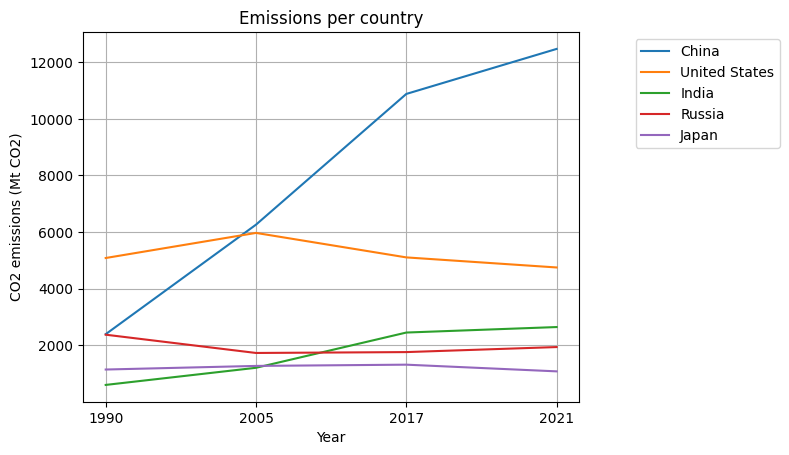

In [6]:
# Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world

fig, ax = plt.subplots()

years = top_5.columns[1:]

for index, row in top_5.iterrows():
  plt.plot(years, row[1:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("CO2 emissions (Mt CO2)")

ax.set_title("Emissions per country")
ax.grid(True)

plt.show()

### Opdracht 2: Worst and best changers

In [ ]:
# Calculate the relative change, where the measurement in 1990 is 100%
# Relative change = current year divided by the year 1990

co2_countries['relative_change_1990'] = co2_countries['1990'] / co2_countries['1990'] * 100
co2_countries['relative_change_2005'] = co2_countries['2005'] / co2_countries['1990'] * 100
co2_countries['relative_change_2017'] = co2_countries['2017'] / co2_countries['1990'] * 100
co2_countries['relative_change_2021'] = co2_countries['2021'] / co2_countries['1990'] * 100


In [ ]:
co2_countries

In [10]:
# Find the top three and bottom three countries with regards to lowering these emissions

best_changers = co2_countries.sort_values(by=['relative_change_2021'])
best_changers_top_3 = best_changers.head(3)

worst_changers = co2_countries.sort_values(by='relative_change_2021', ascending=False)
worst_changers_top_3 = worst_changers.head(3)



In [ ]:
best_and_worst = [best_changers_top_3, worst_changers_top_3]
best_and_worst = pd.concat(best_and_worst)
best_and_worst.columns = ["Country", "1990", "2005", "2017", "2021", "relative_change_1990", "relative_change_2005", "relative_change_2017", "relative_change_2021"]
best_and_worst

In [12]:
best_changers_top_3.columns = ["Country", "90", "05", "17", "21", "1990", "2005", "2017", "2021"]

In [13]:
new_co2_countries = co2_countries
# Rename columns to make it a non-MultiIndex dataframe
new_co2_countries.columns = ["Country", "emissions_1990", "emissions_2005", "emissions_2017", "emissions_2021", "relative_change_1990", "relative_change_2005", "relative_change_2017", "relative_change_2021"]

# Exclude small countries
new_co2_countries = new_co2_countries.loc[co2_countries.emissions_1990 > 5]
new_best_changers = new_co2_countries.sort_values(by=['relative_change_2021'])
new_best_changers_top_3 = new_best_changers.head(3)

new_worst_changers = new_co2_countries.sort_values(by='relative_change_2021', ascending=False)
new_worst_changers_top_3 = new_worst_changers.head(3)

In [14]:
# Top three and bottom three countries that had at least five Mt of CO2 emissions in 1990

new_best_and_worst = [new_best_changers_top_3, new_worst_changers_top_3]
new_best_and_worst = pd.concat(new_best_and_worst)


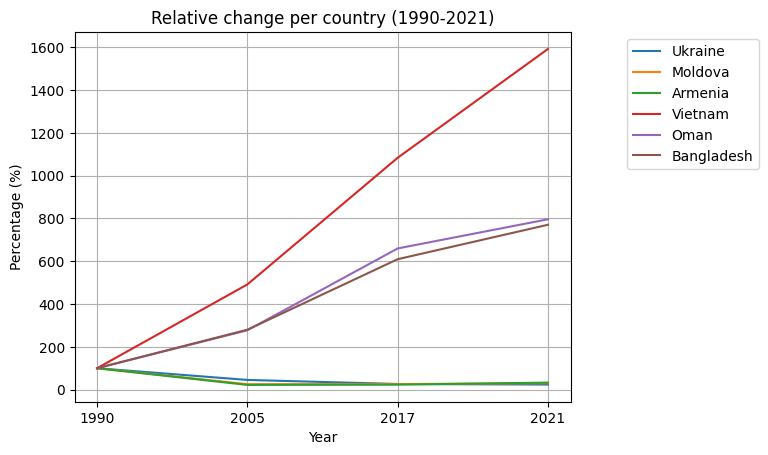

In [16]:
fig, ax = plt.subplots()

years = new_best_and_worst.columns[5:]

for index, row in new_best_and_worst.iterrows():
  plt.plot(years, row[5:], label = row[0])

ax.legend(loc='upper left', bbox_to_anchor=(1.1,1))

ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")

xticks = [0, 1, 2, 3]
xtick_labels = ['1990', '2005', '2017', '2021']

plt.xticks(xticks, xtick_labels)

# Geprobeerd om de y-axis te splitten, zoals besproken in het nakijk video, maar hier kwam ik niet helemaal uit.
#tick1 = np.arange(0,100, 20)

#tick2 = np.arange(100,2000 , 500)
#yticks = np.concatenate((tick1, tick2))

#plt.yticks(yticks)

ax.set_title("Relative change per country (1990-2021)")
ax.grid(True)

plt.show()